In [ ]:
#Prediction and Clustering on Housing Data -

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('BostonHousing.csv')

df.loc[5:10, 'crim'] = np.nan
df.loc[20:25, 'rm'] = np.nan

df = df.fillna(df.median())

print(df.head())
print(df.info())
print(df.describe())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

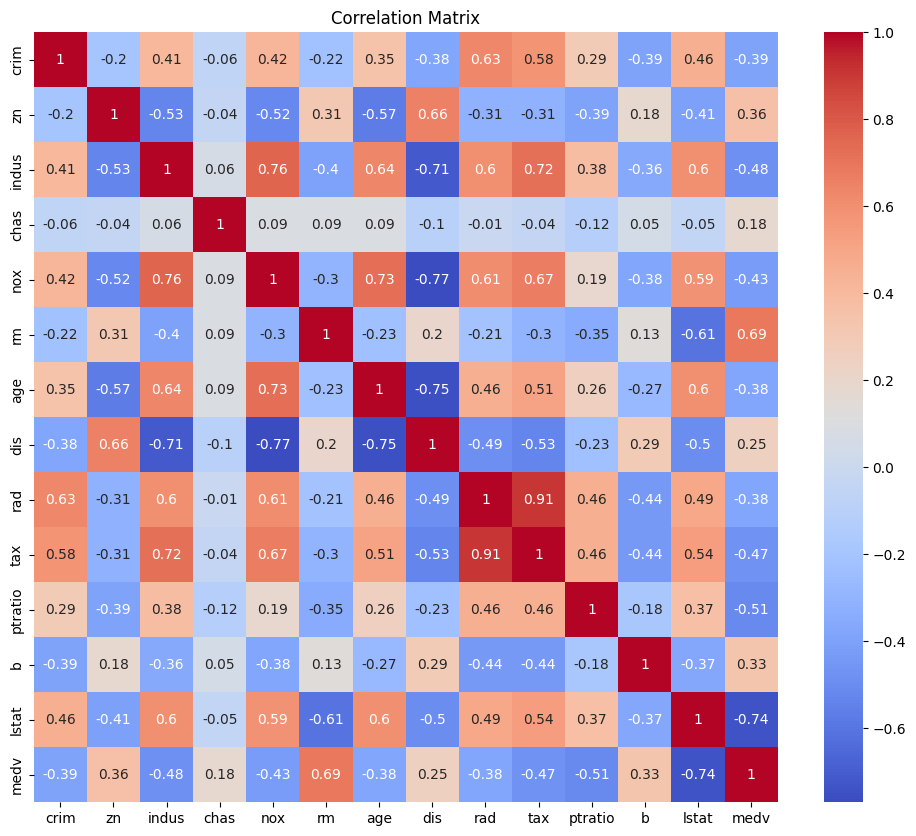

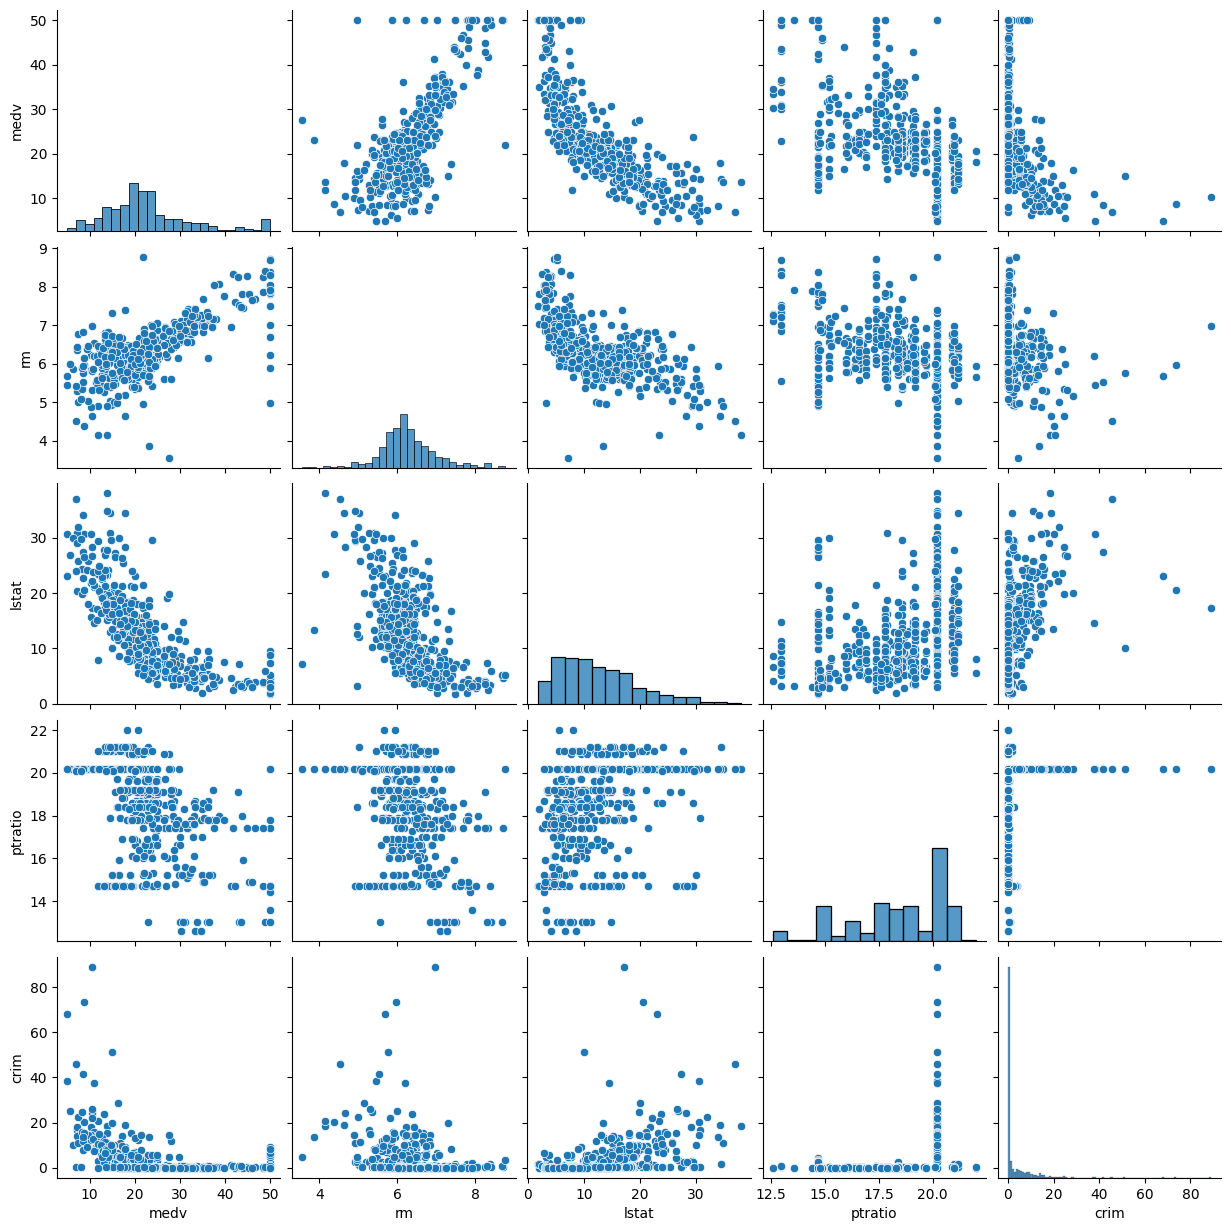

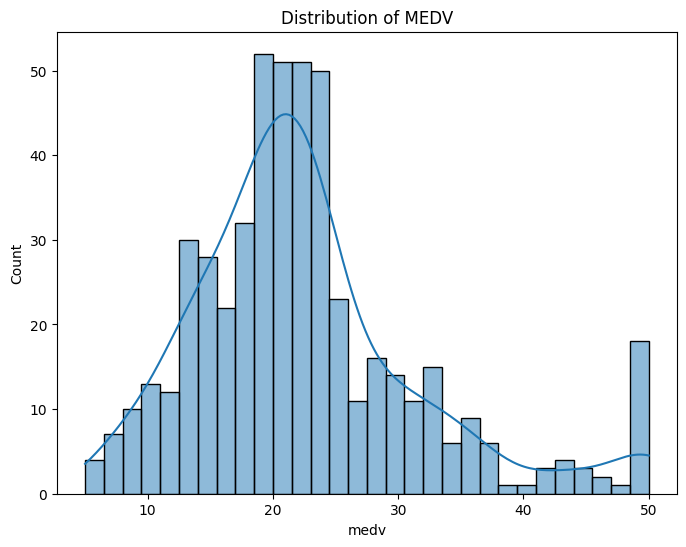

In [17]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['medv', 'rm', 'lstat', 'ptratio', 'crim']])
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['medv'], bins=30, kde=True)
plt.title('Distribution of MEDV')
plt.show()

Feature Importances:
lstat      0.450792
rm         0.361514
dis        0.063691
crim       0.033128
nox        0.021678
ptratio    0.016879
age        0.014621
tax        0.014192
b          0.011056
indus      0.006704
rad        0.003560
zn         0.001407
chas       0.000778
dtype: float64
Top Features: ['lstat', 'rm', 'dis', 'crim', 'nox']


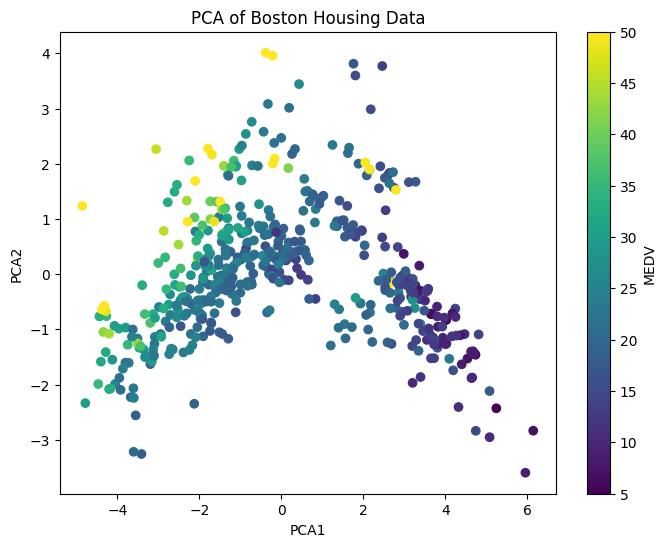

In [18]:
X = df.drop('medv', axis=1)
y = df['medv']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature Importances:")
print(feature_importances)

top_features = feature_importances.index[:5].tolist()
print("Top Features:", top_features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=y, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Boston Housing Data')
plt.colorbar(label='MEDV')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Linear Regression:
Mean Squared Error: 24.475970810492043
R-squared: 0.6662388089677241

Random Forest Regression:
Mean Squared Error: 7.998201892156865
R-squared: 0.8909342795711067


<ipython-input-23-1adc8ce7d421>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


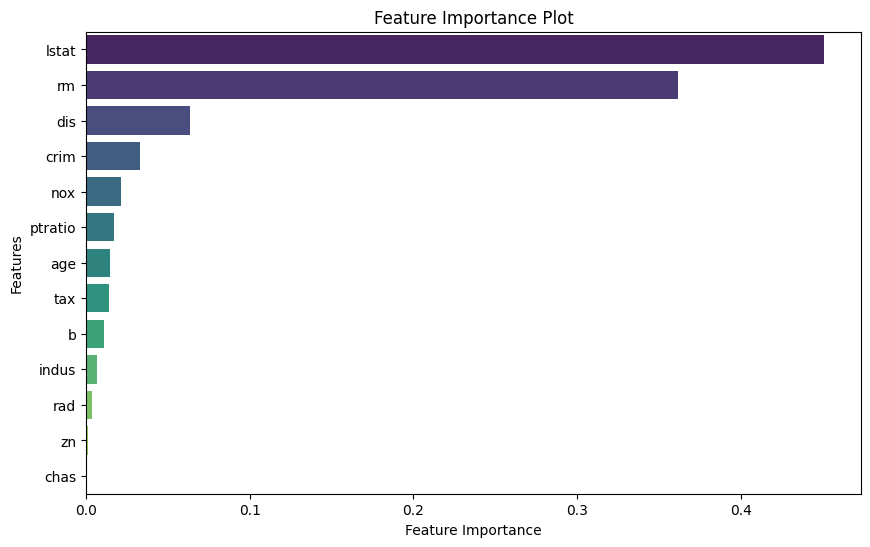

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())

df_no_outliers = df[~outliers]

Number of outliers: 238


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


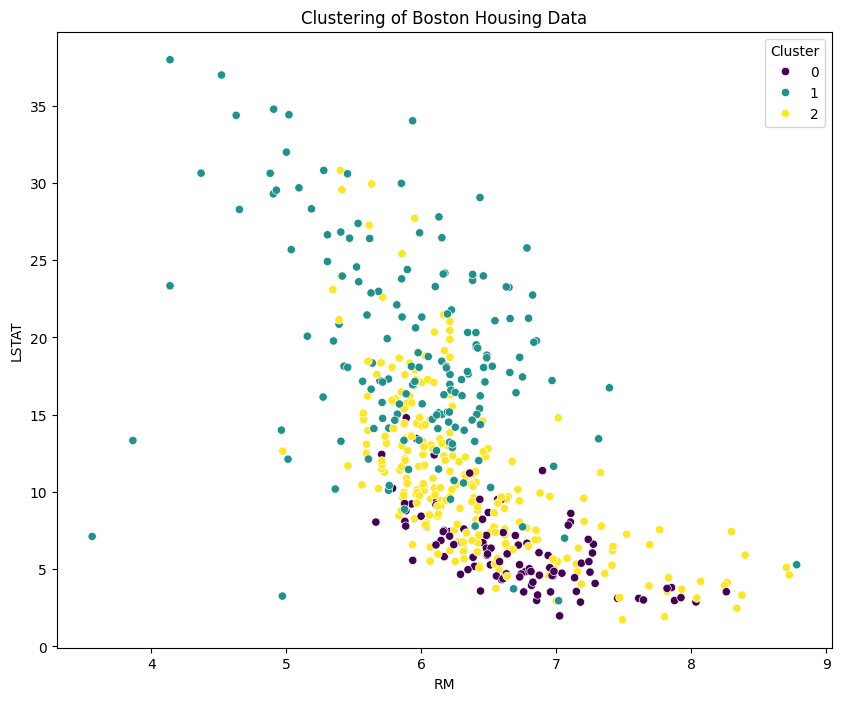

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='rm', y='lstat', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Clustering of Boston Housing Data')
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.show()